# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
weather_info = pd.DataFrame({"Cities":cities})
weather_info

,Cities
0,longyearbyen
1,saleaula
2,ushuaia
3,esperance
4,shache
...,...
589,yantal
590,praia da vitoria
591,wanning
592,mount gambier


In [4]:
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind = []
city_num = 0
city_num_list = []
city_used = []
for city in weather_info['Cities']:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_used.append(city)
        city_num = city_num + 1
        print(city_num, city)
        city_num_list.append(city_num)
    except KeyError:
        print('city not found')
  


1 longyearbyen
city not found
2 ushuaia
3 esperance
4 shache
5 sovetskiy
6 khatanga
7 tawang
city not found
8 salisbury
9 ust-kan
10 maneromango
11 atuona
12 tarko-sale
13 namibe
14 hasaki
15 hermanus
16 vaini
17 mar del plata
18 sohag
city not found
19 punta arenas
20 ribeira grande
21 ranfurly
22 klaksvik
23 kapaa
24 port alfred
25 otane
26 nioro
27 cherskiy
28 port elizabeth
29 fortuna
30 avarua
city not found
31 leningradskiy
32 cockburn town
33 vana-vigala
34 wau
35 qaanaaq
36 new norfolk
37 hobart
38 iqaluit
39 bodaybo
40 barrow
41 karratha
42 petatlan
43 khorixas
44 castro
45 masindi
46 souillac
47 luanda
48 bredasdorp
49 cape town
50 hobyo
51 bluff
52 yerbogachen
53 touros
54 dikson
55 lloydminster
56 saint-augustin
57 tananger
58 rio grande
59 tahta
60 opuwo
61 puerto ayora
62 makakilo city
63 mahibadhoo
64 rikitea
city not found
65 san patricio
66 imeni poliny osipenko
67 cravo norte
68 pevek
69 faanui
70 tshane
city not found
71 okha
72 cabo san lucas
73 bambous virieux
74 k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({'City':city_used, 'Latitude':lat, 'Longitude':lng, 'Temperature (F)':temp, 'Max Temperature (F)': max_temp,
                           'Humidity (%)':humidity, 'Cloudiness (%)':cloudiness, 'Wind Speed (MPH)':wind})
weather_df

,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,longyearbyen,78.22,15.64,-11.60,-11.60,57,0,2.08
1,ushuaia,-54.80,-68.30,40.06,40.06,82,100,5.44
2,esperance,-33.87,121.90,66.40,66.40,80,86,3.38
3,shache,38.42,77.24,20.82,20.82,72,65,2.17
4,sovetskiy,61.36,63.58,-6.72,-6.72,98,44,3.47
...,...,...,...,...,...,...,...,...
533,yantal,56.85,105.25,17.11,17.11,88,97,8.28
534,praia da vitoria,38.73,-27.07,58.77,58.77,63,100,5.23
535,wanning,18.80,110.40,66.27,66.27,92,100,10.54
536,mount gambier,-37.83,140.77,63.36,63.36,75,77,7.81


In [7]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
weather_df = pd.read_csv(output_data_file)

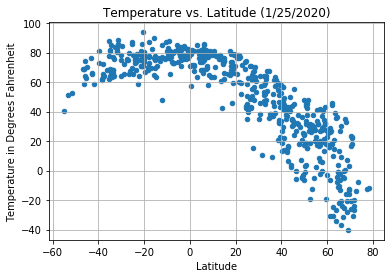

In [9]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Temperature (F)', marker = 'o')
plt.title('Temperature vs. Latitude (1/25/2020)')
plt.ylabel('Temperature in Degrees Fahrenheit')
plt.grid()

#### Latitude vs. Humidity Plot

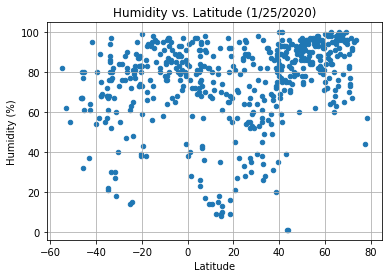

In [10]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity (%)', marker = 'o')
plt.title('Humidity vs. Latitude (1/25/2020)')
plt.ylabel('Humidity (%)')
plt.grid()

#### Latitude vs. Cloudiness Plot

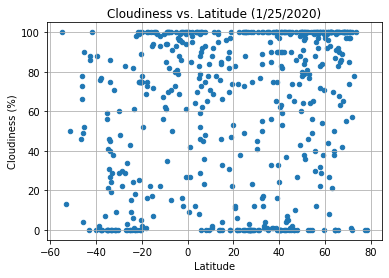

In [11]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness (%)', marker = 'o')
plt.title('Cloudiness vs. Latitude (1/25/2020)')
plt.ylabel('Cloudiness (%)')
plt.grid()

#### Latitude vs. Wind Speed Plot

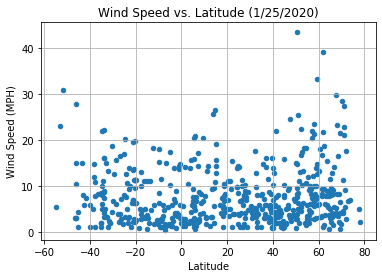

In [12]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed (MPH)', marker = 'o')
plt.title('Wind Speed vs. Latitude (1/25/2020)')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def north_regression(y_variable):
    x_values = north_weather['Latitude']
    y_values = north_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    north_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude (1/25/2020)')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)
    
def south_regression(y_variable):
    x_values = south_weather['Latitude']
    y_values = south_weather[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    south_weather.plot(kind = 'scatter', x = 'Latitude', y = y_variable, marker = 'o')
    plt.title(y_variable +' vs. Latitude (1/25/2020)')
    plt.ylabel(y_variable)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid()
    plt.plot(x_values, regress_values,"r-")
    print(f"R-value equals {str(rvalue)}")
    print(line_eq)



In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_weather = weather_df.loc[weather_df['Latitude']>0]
south_weather = weather_df.loc[weather_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value equals -0.8533997433537845
y = -1.26x + 87.29


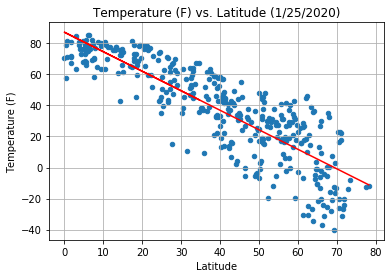

In [15]:
north_regression('Temperature (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value equals 0.49366990685160034
y = 0.3x + 80.96


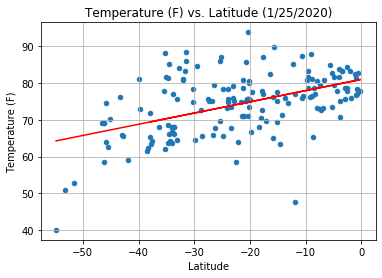

In [16]:
south_regression('Temperature (F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value equals 0.4167948262446294
y = 0.45x + 58.63


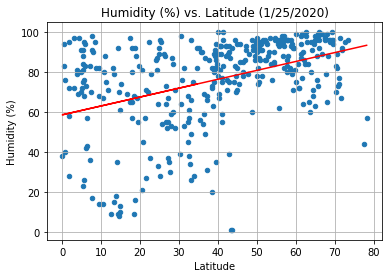

In [17]:
north_regression('Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value equals 0.3643435226947174
y = 0.5x + 84.75


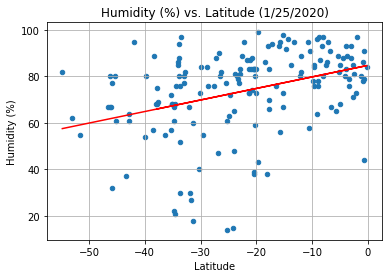

In [18]:
south_regression('Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value equals 0.16596570553817278
y = 0.31x + 50.89


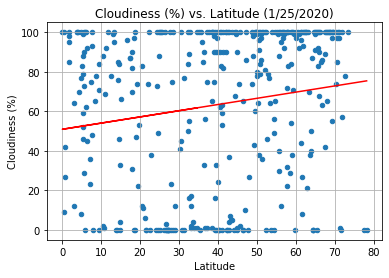

In [19]:
north_regression('Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value equals 0.42854694818825334
y = 1.21x + 80.62


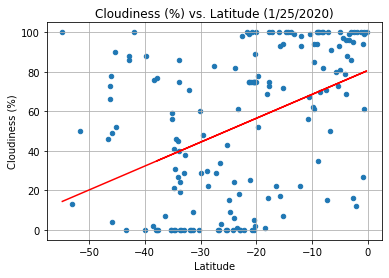

In [20]:
south_regression('Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value equals 0.1413402331137918
y = 0.04x + 6.04


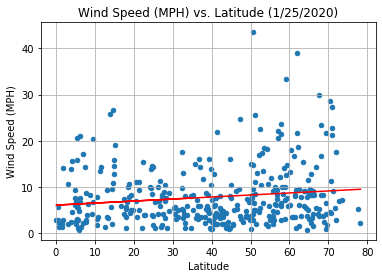

In [21]:
north_regression('Wind Speed (MPH)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value equals -0.2305272475550403
y = -0.1x + 5.25


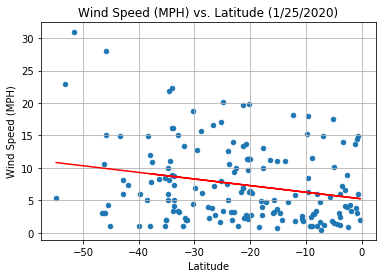

In [22]:
south_regression('Wind Speed (MPH)')